# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
weather_api_key

'63bff54b7a2aa1a0651f8a70d90aa572'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import json

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 80.55,
        "lat": 73.51
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 4.1,
        "feels_like": -13.27,
        "temp_min": 4.1,
        "temp_max": 4.1,
        "pressure": 1026,
        "humidity": 93,
        "sea_level": 1026,
        "grnd_level": 1020
    },
    "visibility": 10000,
    "wind": {
        "speed": 19.86,
        "deg": 184
    },
    "clouds": {
        "all": 59
    },
    "dt": 1603873297,
    "sys": {
        "country": "RU",
        "sunrise": 1603855933,
        "sunset": 1603876243
    },
    "timezone": 25200,
    "id": 1507390,
    "name": "Dikson",
    "cod": 200
}


In [6]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 80.55,
        "lat": 73.51
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 4.1,
        "feels_like": -13.27,
        "temp_min": 4.1,
        "temp_max": 4.1,
        "pressure": 1026,
        "humidity": 93,
        "sea_level": 1026,
        "grnd_level": 1020
    },
    "visibility": 10000,
    "wind": {
        "speed": 19.86,
        "deg": 184
    },
    "clouds": {
        "all": 59
    },
    "dt": 1603873297,
    "sys": {
        "country": "RU",
        "sunrise": 1603855933,
        "sunset": 1603876243
    },
    "timezone": 25200,
    "id": 1507390,
    "name": "Dikson",
    "cod": 200
}


In [7]:

city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []


processing_record = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:


    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
      
        
    except:
        print("City not found. Skipping...") 
    continue


print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint George
Processing Record 1 | Ampanihy
City not found. Skipping...
Processing Record 1 | Kaitangata
Processing Record 1 | Nanortalik
Processing Record 1 | Jamestown
Processing Record 1 | Oistins
Processing Record 1 | Merke
Processing Record 1 | Kutum
Processing Record 1 | San Juan
Processing Record 1 | Dikson
Processing Record 1 | Ushuaia
Processing Record 1 | Lebu
Processing Record 1 | Saskylakh
Processing Record 1 | Hong Kong
Processing Record 1 | Ponta do Sol
Processing Record 1 | Kożuchów
City not found. Skipping...
Processing Record 1 | Los Llanos de Aridane
Processing Record 1 | Punta Arenas
Processing Record 1 | Bambous Virieux
Processing Record 1 | Escárcega
Processing Record 1 | Aras
City not found. Skipping...
Processing Record 1 | Villafranca de los Barros
City not found. Skipping...
Processing Record 1 | Kanniyākumāri
City not found. Skipping...
City not found. Skipping...
Processing Record 

Processing Record 1 | Inírida
Processing Record 1 | Anáhuac
City not found. Skipping...
Processing Record 1 | Peniche
Processing Record 1 | Dingle
Processing Record 1 | Isangel
Processing Record 1 | Teahupoo
Processing Record 1 | Yerbogachën
Processing Record 1 | Namatanai
Processing Record 1 | Vestmanna
Processing Record 1 | Nara
Processing Record 1 | Médéa
Processing Record 1 | Kautokeino
City not found. Skipping...
Processing Record 1 | Vaitape
Processing Record 1 | Talnakh
Processing Record 1 | Clearwater
Processing Record 1 | Quelimane
Processing Record 1 | Ugoofaaru
Processing Record 1 | Youhao
City not found. Skipping...
Processing Record 1 | Pisco
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Klaksvík
Processing Record 1 | Havøysund
City not found. Skipping...
Processing Record 1 | Khandyga
Processing Record 1 | Nago
Processing Record 1 | Cap Malheureux
Processing Record 1 | Yar-Sale
Processing Record 1 | Kars
Processing Record 1 | Marsh Harbour


Processing Record 1 | Bougouni
Processing Record 1 | Padang
Processing Record 1 | Monchegorsk
Processing Record 1 | Bambanglipuro
Processing Record 1 | Almaznyy
Processing Record 1 | Agen
Processing Record 1 | Aurillac
Processing Record 1 | Nantucket
Processing Record 1 | Tongchuanshi
City not found. Skipping...
Processing Record 1 | Taebla
Processing Record 1 | Tilichiki
Processing Record 1 | High Level
Processing Record 1 | Whitehorse
Processing Record 1 | Kloulklubed
Processing Record 1 | Toowoomba
Processing Record 1 | Santa Cruz Cabrália
Processing Record 1 | Sosnogorsk
Processing Record 1 | Akçakoca
Processing Record 1 | Abu Samrah
Processing Record 1 | Guozhen
City not found. Skipping...
Processing Record 1 | Kundiawa
Processing Record 1 | Champerico
Processing Record 1 | Pangody
Processing Record 1 | Freeport
Processing Record 1 | Mendi
Processing Record 1 | Fairbanks
Processing Record 1 | Vostok
Processing Record 1 | Shihezi
Processing Record 1 | Dovolnoye
Processing Record 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Export the city data into a .csv.

weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City               530
Country            530
Date               530
Latitude           530
Longitude          530
Max Temperature    530
Humidity           530
Cloudiness         530
Wind Speed         530
dtype: int64

In [9]:

# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Saint George,US,1603873297,37.10,-113.58,48.20,23,1,5.82
1,Ampanihy,MG,1603873297,-24.70,44.75,87.76,41,0,13.44
2,Kaitangata,NZ,1603873298,-46.28,169.85,52.00,83,91,10.00
3,Nanortalik,GL,1603873298,60.14,-45.24,30.49,92,100,1.21
4,Jamestown,US,1603873298,42.10,-79.24,41.00,100,90,4.43


In [10]:

# output data to csv
weather_data.to_csv("./weather_data_output.csv")
weather_data.to_csv("./weather_data_output.xls")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

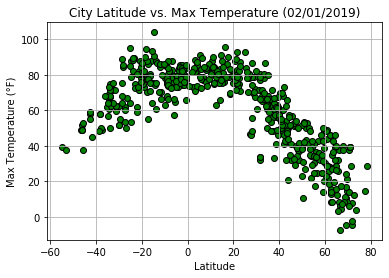

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

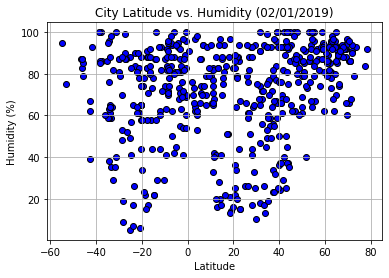

In [12]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

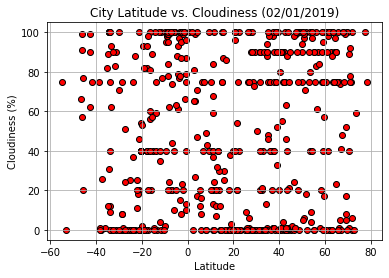

In [13]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

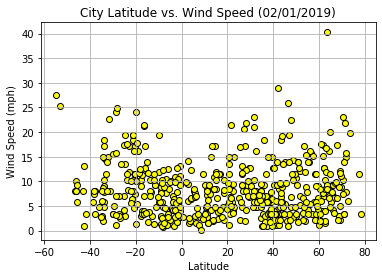

In [14]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [15]:
weather_data.head

<bound method NDFrame.head of              City Country        Date  Latitude  Longitude  Max Temperature  \
0    Saint George      US  1603873297     37.10    -113.58            48.20   
1        Ampanihy      MG  1603873297    -24.70      44.75            87.76   
2      Kaitangata      NZ  1603873298    -46.28     169.85            52.00   
3      Nanortalik      GL  1603873298     60.14     -45.24            30.49   
4       Jamestown      US  1603873298     42.10     -79.24            41.00   
..            ...     ...         ...       ...        ...              ...   
525       Kodinsk      RU  1603873422     58.69      99.18            34.99   
526     ‘Āhuimanu      US  1603873423     21.44    -157.84            78.80   
527       Yankton      US  1603873423     42.87     -97.40            32.00   
528           Hīt      IQ  1603873423     33.64      42.83            86.52   
529      Zhigansk      RU  1603873423     66.77     123.37            -7.28   

     Humidity  Cloudi

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
import scipy.stats as st


In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere = weather_data.loc[weather_data["Latitude"] >= 0]
south_hemisphere = weather_data.loc[weather_data["Latitude"] < 0]

In [18]:

# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
weather_data.dtypes

City                object
Country             object
Date                 int64
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity             int64
Cloudiness           int64
Wind Speed         float64
dtype: object

The r-squared is : -0.88


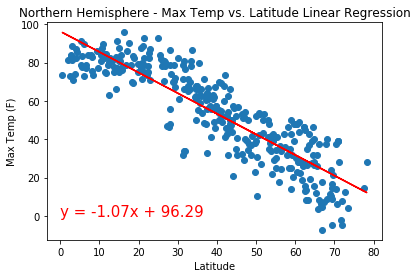

In [20]:

equation = linear_regression(north_hemisphere["Latitude"], north_hemisphere["Max Temperature"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("./Final_PNG/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
equation = linear_regression(south_hemisphere["Latitude"], north_hemisphere["Max Temperature"])

annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("./Final_PNG/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

ValueError: x and y must have the same length.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35


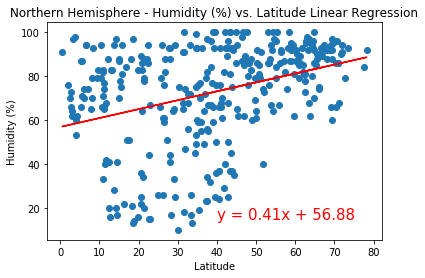

In [25]:

equation = linear_regression(north_hemisphere["Latitude"], north_hemisphere["Humidity"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./Final_PNG/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.07


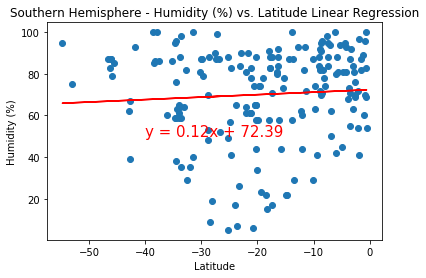

In [28]:
# Call an function #1
equation = linear_regression(south_hemisphere["Latitude"], south_hemisphere["Humidity"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./Final_PNG/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.22


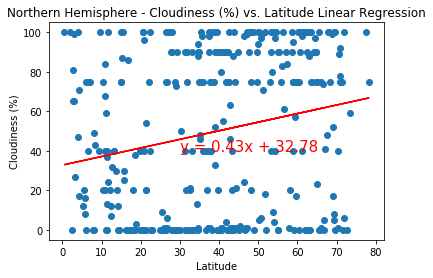

In [29]:
equation = linear_regression(north_hemisphere["Latitude"], north_hemisphere["Cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("./Final_PNG/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.22


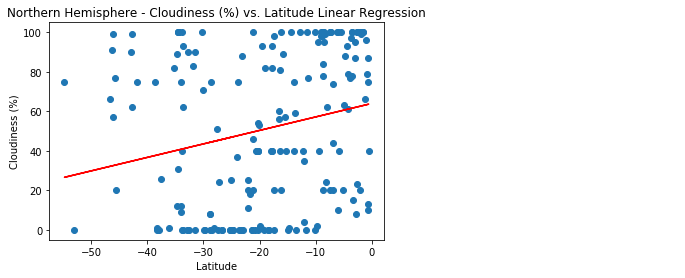

In [30]:
equation = linear_regression(south_hemisphere["Latitude"], south_hemisphere["Cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("./Final_PNG/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.15


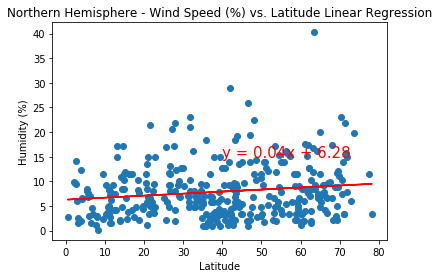

In [32]:
equation = linear_regression(north_hemisphere["Latitude"], north_hemisphere["Wind Speed"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./Final_PNG/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


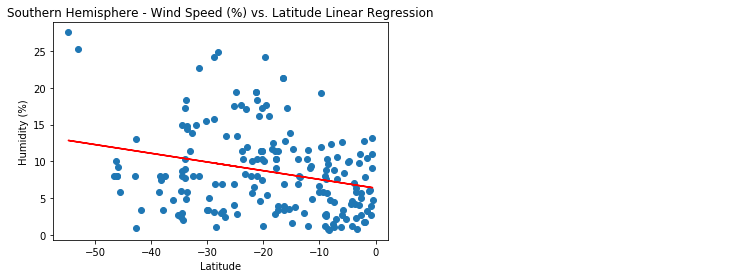

In [33]:
equation = linear_regression(south_hemisphere["Latitude"], south_hemisphere["Wind Speed"])
annotate(equation, 40, 15)
plt.title("Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./Final_PNG/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")